In [1]:
import chess
import chess.engine
import chess.variant
import numpy
import random
import pandas
import csv

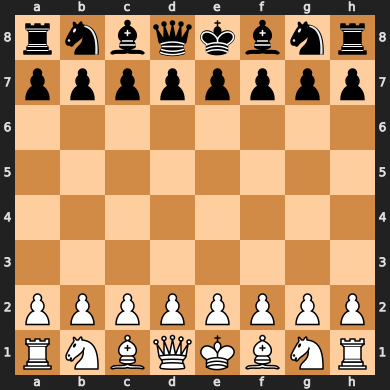

In [2]:
board = chess.Board()

board

In [3]:
b0a = 'rnbqkbnr'
b0b = 'pppppppp'
b0 = b0a + '/' + b0b

b1a = 'rbbqkbbr'
b1b = 'pppppppp'
b1 = b1a + '/' + b1b

b2a = 'rnnqknnr'
b2b = 'pppppppp'
b2 = b2a + '/' + b2b

b3a = 'rnbqkbnr'
b3b = 'n1pppp1p'
b3 = b3a + '/' + b3b

b4a = 'rnbqkbnr'
b4b = 'p1pnpp1p'
b4 = b4a + '/' + b4b


b5a = 'rnbqkbnr'
b5b = 'p2nn2p'
b5 = b5a + '/' + b5b

b6a = 'rnbqkbnr'
b6b = 'n2pp2n'
b6 = b6a + '/' + b6b

w0 = b0b.upper() + "/" + b0a.upper()
w1 = b1b.upper() + "/" + b1a.upper()
w2 = b2b.upper() + "/" + b2a.upper()
w3 = b3b.upper() + "/" + b3a.upper()
w4 = b4b.upper() + "/" + b4a.upper()
w5 = b5b.upper() + "/" + b5a.upper()
w6 = b6b.upper() + "/" + b6a.upper()

In [4]:
bstart = [b0,b1,b2,b3,b4,b5,b6]
wstart = [w0,w1,w2,w3,w4,w5,w6]
move = ['b','w']

random.sample(bstart,1)[0]
random.sample(move,1)[0]

'w'

In [5]:
#### Regular play

engine = chess.engine.SimpleEngine.popen_uci("C:/Users/esq60/stockfish_14.1_win_x64_avx2/stockfish_14.1_win_x64_avx2.exe")
x = []
res = []
b_init = []
w_init = []
m_init = []
for i in range(0,2000):
    print(i)
    
    bval = random.sample(bstart,1)[0]
    wval = random.sample(wstart,1)[0]
    mval = random.sample(move,1)[0]
    board = chess.Board(fen= bval +"/8/8/8/8/" + wval + " " + mval +" - - 0 1")

    while not board.is_game_over():
        result = engine.play(board, chess.engine.Limit(time=0.1))
        board.push(result.move)


    """ b_init.append(bval)
    w_init.append(wval)
    m_init.append(mval)
    x.append(i)
    res.append(board.outcome().winner) """

    d = {'b_init': bval, 'w_init': wval, 'iter': i, 'game_res': board.outcome().winner, 'move': mval}
    print(d)
    #df = pandas.DataFrame(data = d, index=[0])
    

    # read header automatically
    
    header = ['b_init','w_init','iter','game_res','move']

    # add row to CSV file
    with open('chessout1.csv', "a", newline='') as f:
        writer = csv.DictWriter(f, fieldnames=header)
        writer.writerow(d)

engine.quit()


0
{'b_init': 'rnnqknnr/pppppppp', 'w_init': 'P2NN2P/RNBQKBNR', 'iter': 0, 'game_res': True, 'move': 'b'}
1
{'b_init': 'rnbqkbnr/p1pnpp1p', 'w_init': 'P1PNPP1P/RNBQKBNR', 'iter': 1, 'game_res': None, 'move': 'b'}
2
{'b_init': 'rnbqkbnr/n1pppp1p', 'w_init': 'P2NN2P/RNBQKBNR', 'iter': 2, 'game_res': True, 'move': 'b'}
3
{'b_init': 'rnbqkbnr/pppppppp', 'w_init': 'N1PPPP1P/RNBQKBNR', 'iter': 3, 'game_res': False, 'move': 'b'}
4
{'b_init': 'rbbqkbbr/pppppppp', 'w_init': 'PPPPPPPP/RNNQKNNR', 'iter': 4, 'game_res': None, 'move': 'b'}
5
{'b_init': 'rnbqkbnr/n1pppp1p', 'w_init': 'P1PNPP1P/RNBQKBNR', 'iter': 5, 'game_res': True, 'move': 'w'}
6
{'b_init': 'rnbqkbnr/n1pppp1p', 'w_init': 'N2PP2N/RNBQKBNR', 'iter': 6, 'game_res': True, 'move': 'w'}
7
{'b_init': 'rbbqkbbr/pppppppp', 'w_init': 'P1PNPP1P/RNBQKBNR', 'iter': 7, 'game_res': True, 'move': 'w'}
8
{'b_init': 'rnnqknnr/pppppppp', 'w_init': 'PPPPPPPP/RBBQKBBR', 'iter': 8, 'game_res': None, 'move': 'b'}
9
{'b_init': 'rnbqkbnr/p2nn2p', 'w_init': 

In [ ]:
d = {'b_init': b_init, 'w_init': w_init, 'iter': x, 'game_res': res, 'move': m_init}
df = pandas.DataFrame(data = d)
df

,b_init,w_init,iter,game_res,move
0,rbbqkbbr/pppppppp,1NPPPPP1/RNBQKBNR,0,True,w
1,rnnqknnr/pppppppp,3NR3/RNBQKBNR,1,True,b
2,rnnqknnr/pppppppp,PPPPPPPP/RNNQKNNR,2,None,w
3,rbbqkbbr/pppppppp,PPPPPPPP/RNNQKNNR,3,False,w
4,rbbqkbbr/pppppppp,PPPPPPPP/RNNQKNNR,4,False,w
5,rnbqkbnr/3nr3,3NR3/RNBQKBNR,5,True,w
6,rnnqknnr/pppppppp,PPPPPPPP/RNNQKNNR,6,None,b
7,rnnqknnr/pppppppp,3NR3/RNBQKBNR,7,True,b
8,rnbqkbnr/3nr3,3NR3/RNBQKBNR,8,True,w
9,rnbqkbnr/3nr3,1BPPPPP1/RNBQKBNR,9,True,w


In [48]:
#### Variant Play

engine = chess.engine.SimpleEngine.popen_uci("C:/Users/esq60/stockfish_14.1_win_x64_avx2/fairy-stockfish-largeboard_x86-64.exe")
x = []
res = []
b_init = []
w_init = []
m_init = []
for i in range(0,2000):
    print(i)
    
    bval = random.sample(bstart,1)[0]
    wval = random.sample(wstart,1)[0]
    mval = random.sample(move,1)[0]
    
    board = chess.variant.ThreeCheckBoard(fen= bval +"/8/8/8/8/" + wval + " " + mval +" - - 0 1")

    while not board.is_variant_end():
        result = engine.play(board, chess.engine.Limit(time=0.1))
        board.push(result.move)


    """ b_init.append(bval)
    w_init.append(wval)
    m_init.append(mval)
    x.append(i)
    res.append(board.outcome().winner) """

    d = {'b_init': bval, 'w_init': wval, 'iter': i, 'game_res': board.outcome().winner, 'move': mval}
    print(d)
    #df = pandas.DataFrame(data = d, index=[0])
    

    # read header automatically
    
    header = ['b_init','w_init','iter','game_res','move']

    # add row to CSV file
    with open('chessout1_var.csv', "a", newline='') as f:
        writer = csv.DictWriter(f, fieldnames=header)
        writer.writerow(d)

engine.quit()


0
{'b_init': 'rnnqknnr/pppppppp', 'w_init': 'P2NN2P/RNBQKBNR', 'iter': 0, 'game_res': True, 'move': 'b'}
1
{'b_init': 'rnbqkbnr/pppppppp', 'w_init': 'PPPPPPPP/RBBQKBBR', 'iter': 1, 'game_res': True, 'move': 'b'}
2
{'b_init': 'rnbqkbnr/n1pppp1p', 'w_init': 'P1PNPP1P/RNBQKBNR', 'iter': 2, 'game_res': False, 'move': 'b'}
3
{'b_init': 'rbbqkbbr/pppppppp', 'w_init': 'PPPPPPPP/RNBQKBNR', 'iter': 3, 'game_res': False, 'move': 'b'}
4
{'b_init': 'rnbqkbnr/n1pppp1p', 'w_init': 'PPPPPPPP/RNNQKNNR', 'iter': 4, 'game_res': False, 'move': 'b'}
5
{'b_init': 'rnbqkbnr/n1pppp1p', 'w_init': 'P1PNPP1P/RNBQKBNR', 'iter': 5, 'game_res': False, 'move': 'b'}
6
{'b_init': 'rnbqkbnr/n1pppp1p', 'w_init': 'PPPPPPPP/RNBQKBNR', 'iter': 6, 'game_res': False, 'move': 'w'}
7
{'b_init': 'rnbqkbnr/p1pnpp1p', 'w_init': 'PPPPPPPP/RNBQKBNR', 'iter': 7, 'game_res': False, 'move': 'w'}
8
{'b_init': 'rnnqknnr/pppppppp', 'w_init': 'N1PPPP1P/RNBQKBNR', 'iter': 8, 'game_res': True, 'move': 'b'}
9
{'b_init': 'rnnqknnr/pppppppp',

KeyboardInterrupt: 

In [ ]:
df.to_csv('chessout.csv')

In [114]:
engine = chess.engine.SimpleEngine.popen_uci("C:/Users/esq60/stockfish_14.1_win_x64_avx2/stockfish_14.1_win_x64_avx2.exe")

board = chess.Board()
while not board.is_game_over():
    info = chess.engine.PovScore(relative = chess.engine.Cp, turn = chess.WHITE)
    result = engine.play(board, chess.engine.Limit(time=0.1))
    board.push(result.move)
    print(info())

board

TypeError: 'PovScore' object is not callable

In [102]:
info = chess.engine.Score.score(chess.WHITE)

In [103]:
print(info)

None


In [93]:
print(sc)

None
